In [24]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt

In [56]:
df =  pd.read_csv(r'C:\Users\SONY\Desktop\Machine Learning\Tensorflow\datasets\Churn_Modelling.csv')

In [58]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
636,637,15603323,Bell,660,Spain,Female,33,1,0.00,2,0,0,117834.91,0
1168,1169,15710456,Balmain,607,France,Female,27,2,0.00,2,1,0,63495.86,0
9220,9221,15600399,Trentino,598,France,Male,60,4,0.00,1,1,0,197727.14,1
3918,3919,15740283,Ewing,850,France,Male,29,1,0.00,2,0,0,152996.89,0
8689,8690,15684769,Whitson,542,France,Male,67,10,129431.36,1,0,1,21343.74,0
589,590,15591047,Ma,519,Spain,Female,47,6,157296.02,2,0,0,147278.43,1
3632,3633,15684696,Lei,560,Spain,Female,26,3,116576.45,1,1,0,157567.37,0
2604,2605,15643752,Wei,540,France,Male,25,5,116160.23,1,1,0,13411.67,0
7215,7216,15684440,Monaldo,548,Germany,Male,32,2,98986.28,1,1,1,55867.38,0
3551,3552,15580629,Blackwood,604,France,Male,31,6,134837.58,1,1,0,192029.19,0


In [59]:
df.shape

(10000, 14)

In [60]:
df.drop(['CustomerId',"Surname",'RowNumber'],axis='columns',inplace = True)

In [61]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
476,605,Germany,Female,31,1,117992.59,1,1,1,183598.77,0
8700,709,Germany,Male,23,8,73314.04,2,1,0,63446.47,0
9248,629,Spain,Male,34,6,0.00,2,1,0,190347.72,0
2265,623,France,Female,35,5,0.00,2,1,0,101192.08,0
3150,573,Germany,Female,35,9,206868.78,2,0,1,102986.15,0
402,751,Spain,Male,52,8,0.00,2,0,1,179291.85,0
6146,738,Spain,Female,33,3,122134.40,2,0,1,27867.59,0
9490,624,France,Male,80,3,0.00,1,1,1,65801.44,0
3056,685,France,Male,58,1,104796.54,1,1,1,154181.41,0
7124,596,Germany,Male,34,4,99441.21,2,0,1,4802.27,0


In [62]:
df.shape

(10000, 11)

In [63]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [64]:
df.values

array([[619, 'France', 'Female', ..., 1, 101348.88, 1],
       [608, 'Spain', 'Female', ..., 1, 112542.58, 0],
       [502, 'France', 'Female', ..., 0, 113931.57, 1],
       ...,
       [709, 'France', 'Female', ..., 1, 42085.58, 1],
       [772, 'Germany', 'Male', ..., 0, 92888.52, 1],
       [792, 'France', 'Female', ..., 0, 38190.78, 0]], dtype=object)

In [65]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [66]:
 df.rename(columns={'Exited':'Churn'},inplace = True)

In [67]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')

C:\Users\SONY\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


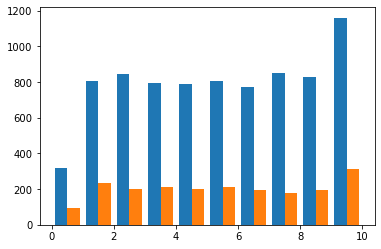

In [68]:
tenureN = df[df.Churn ==0].Tenure
tenureY =  df[df.Churn ==1].Tenure
plt.hist([tenureN,tenureY])
plt.show()

In [69]:
def unique_val():
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}:{df[column].unique()}')

In [70]:
unique_val()

Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']


In [71]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [72]:
df3 = pd.get_dummies(data = df, columns=["Geography"])
df3.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Churn',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [73]:

cols_to_scale = ['Tenure','Balance','EstimatedSalary','CreditScore']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3[cols_to_scale] = scaler.fit_transform(df3[cols_to_scale])

In [74]:
X = df3.drop('Churn',axis='columns')
y = df3['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [85]:
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32 ,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=25)

Epoch 1/25
250/250 [==============================] - 1s 2ms/step - loss: 0.5694 - accuracy: 0.7794
Epoch 2/25
250/250 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.7999
Epoch 3/25
250/250 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.8069
Epoch 4/25
250/250 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.8077
Epoch 5/25
250/250 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.8117
Epoch 6/25
250/250 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.8110
Epoch 7/25
250/250 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8152
Epoch 8/25
250/250 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.8151
Epoch 9/25
250/250 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.8150
Epoch 10/25
250/250 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.8148

In [86]:
yp = model.predict(X_test)
yp[:5]

array([[0.07097051],
       [0.09945917],
       [0.13440552],
       [0.11444831],
       [0.1342679 ]], dtype=float32)

In [87]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
print(y_pred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [88]:
y_test[:5]

7054    0
442     0
3954    0
2288    0
3196    0
Name: Churn, dtype: int64

In [89]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1595
           1       0.63      0.53      0.57       405

    accuracy                           0.84      2000
   macro avg       0.76      0.72      0.74      2000
weighted avg       0.83      0.84      0.84      2000

